In [19]:
#tool box
import pandas as pd
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches

#stylin'
plt.style.use('seaborn-darkgrid')

#import data
data=pd.read_excel('rivers_only.xlsx')

Calculating d13C of DIC based on pH (assuming equilibrium)
Equations from Zeebe and Wolf-Gladrow (2001).

In [20]:
#solving d13C of DIC based on pH for FRESHWATER (S=0)

T=20    #degree C
S=0    #freshwater
Alk=1320 #microeq/kg
DIC=2000 #micromol/kg
pH = 6

H=10**(-pH)  #convert pH to H+
TK = T + 273.15        #Convert temperature to Kelvin

#calculating carbonate equilibrium constants from T and S (Lueker et al., 2000, Mar Chem vol70, 105-119)
K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))

#solving for concentrations of DIC components- equations from Zeebee
HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))

#constant d13C values for indiv DIC components
CO2aq=-9
CO3=-2
HCO3=0

#calculating d13C of DIC based on weighted C concentrations
d13C_DIC = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3

print('d13C of DIC = ',d13C_DIC)

d13C of DIC =  -5.292536098064438


In [21]:
#solving d13C of DIC based on pH (assuming equilibrium) - making the purple line!

T=20    #degree C
S=35    #PSS
Alk=2300 #microeq/kg
DIC=2100 #micromol/kg
pH = np.arange(4,11,.1)

H=10**(-pH)  #convert pH to H+
TK = T + 273.15        #Convert temperature to Kelvin

#calculating carbonate equilibrium constants from T and S (Lueker et al., 2000, Mar Chem vol70, 105-119)
K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))

#solving for concentrations of DIC components- equations from Zeebee
HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))

#constant d13C values for indiv DIC components
CO2aq=-9
CO3=-2
HCO3=0

#calculating d13C of DIC based on weighted C concentrations
d13C_DIC = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3

print('d13C of DIC = ',d13C_DIC)

d13C of DIC =  [-8.88588505 -8.85680764 -8.82047069 -8.77514672 -8.71874494 -8.64876141
 -8.56223804 -8.45574123 -8.32537658 -8.16686113 -7.97567974 -7.74735325
 -7.47784005 -7.16407459 -6.80461163 -6.40029687 -5.95483096 -5.47505965
 -4.97083388 -4.4543609  -3.93909953 -3.43839561 -2.96414246 -2.52574277
 -2.1295459  -1.77878978 -1.47395064 -1.21333881 -0.99377628 -0.81123197
 -0.66134374 -0.53980349 -0.44261269 -0.36623187 -0.30765188 -0.26441239
 -0.23458768 -0.21675398 -0.20994646 -0.21360975 -0.22754136 -0.25182453
 -0.28674524 -0.33268733 -0.39000199 -0.45885345 -0.53905154 -0.629894
 -0.73005169 -0.83753423 -0.94976441 -1.0637663  -1.17644003 -1.28486786
 -1.38658598 -1.47976844 -1.56329874 -1.63673643 -1.70020883 -1.75426547
 -1.7997288  -1.83756324 -1.86877337 -1.89433297 -1.91514104 -1.93199912
 -1.94560358 -1.95654769 -1.96532928 -1.97236127]


The SILLY Olivia first attempt at plotting a binned average:

In [35]:
# binned average- to evaluate at what pH's the river d13C is completely off versus not too far from the predicted d13C-DIC
# (in other words, do you have more disequilibrium/weird stuff going on at lower or higher pHs?)
# If I binned the data into pH intervals, and took the averages for each bin, 
# I predict that the average value for each bin should be -5ish permil below the d13C-DIC line




min_value = data['pH'].min()
max_value = data['pH'].max()
print(min_value)
print(max_value)

# bins = np.linspace(min_value,max_value,10)
bins = np.linspace(4,9.86,10)
# print(bins)

y = data['d13C_DIC']
x = data['pH']

x0 = 4
x1 = 4.65
x2 = 5.3
x3 = 5.95
x4 = 6.6
x5 = 7.26
x6 = 7.9
x7 = 8.56
x8 = 9.21
x9 = 9.86

y1 = np.average(y[(x0 < x) & (x < x1)])
y2 = np.average(y[(x1 < x) & (x < x2)])
y3 = np.average(y[(x2 < x) & (x < x3)])
y4 = np.average(y[(x3 < x) & (x < x4)])
y5 = np.average(y[(x4 < x) & (x < x5)])
y6 = np.average(y[(x5 < x) & (x < x6)])
y7 = np.average(y[(x6 < x) & (x < x7)])
y8 = np.average(y[(x7 < x) & (x < x8)])
y9 = np.average(y[(x8 < x) & (x < x9)])

X1 = ((x0+x1)/2)
X2 = ((x1+x2)/2)
X3 = ((x2+x3)/2)
X4 = ((x3+x4)/2)
X5 = ((x4+x5)/2)
X6 = ((x5+x6)/2)
X7 = ((x6+x7)/2)
X8 = ((x7+x8)/2)
X9 = ((x8+x9)/2)

Y = (y1,y2,y3,y4,y5,y6,y7,y8,y9)
X = (X1,X2,X3,X4,X5,X6,X7,X8,X9)

1.64
10.2


Adding GLODAP ocean pH data

WHENEVER GLODAPv2 DATABASE IS USED, PLEASE CITE THE RELEVANT ESSD PAPER: 
 
Olsen, A., R. M. Key, S. van Heuven, S. K. Lauvset, A. Velo, X. Lin, C. Schirnick, A. Kozyr, T. Tanhua, M. Hoppema, 
S. Jutterström, R. Steinfeldt, E. Jeansson, M. Ishii, F. F. Pérez and T. Suzuki. The Global Ocean Data Analysis Project 
version 2 (GLODAPv2) - an internally consistent data product for the world ocean, Earth System Science Data, 8, 297-323, 2016. 
doi: 10.5194/essd-8-297-2016   

In [23]:
#import GLODAP ocean pH data
data2=pd.read_excel('GLODAP_pH.xlsx')
x=data2['G2phtsinsitutp']
a=np.min(x)
b=np.max(x)
print(a)
print(b)

6.3144
9.3666


In [24]:
#import GLODAP ocean pH data
data2=pd.read_excel('GLODAP_pH.xlsx')
x=data2['G2phtsinsitutp']
a=np.min(x)
b=np.max(x)
fun=stats.gaussian_kde(x)
x2=np.arange(a,b,.1)
y=fun(x2)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00,
        1.3000e+01, 3.9800e+02, 9.3730e+03, 1.6201e+04, 4.7945e+04,
        6.5995e+04, 8.0688e+04, 8.8911e+04, 1.8044e+04, 1.4340e+03,
        3.9900e+02, 7.1000e+01, 1.0000e+01, 5.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([6.3144, 6.4144, 6.5144, 6.6144, 6.7144, 6.8144, 6.9144, 7.0144,
        7.1144, 7.2144, 7.3144, 7.4144, 7.5144, 7.6144, 7.7144, 7.8144,
        7.9144, 8.0144, 8.1144, 8.2144, 8.3144, 8.4144, 8.5144, 8.6144,
        8.7144, 8.8144, 8.9144, 9.0144, 9.1144, 9.2144, 9.3144]),
 <BarContainer object of 30 artists>)

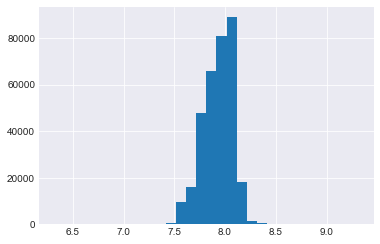

In [25]:

plt.hist(x,bins=x2)

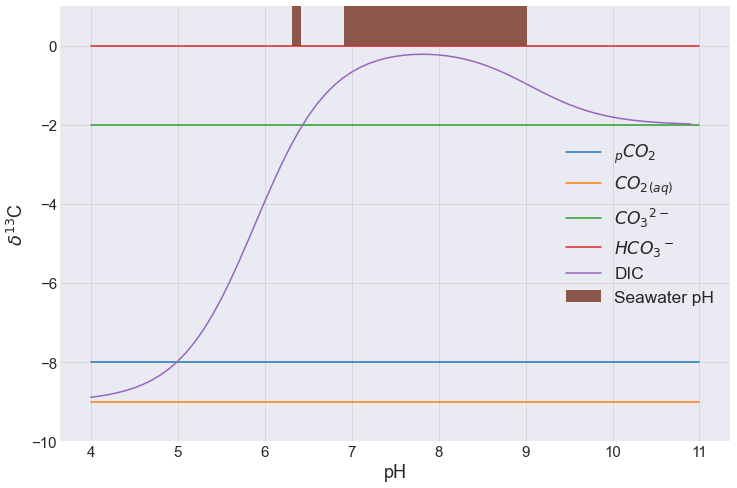

In [26]:
#basic plot
pCO2=(-8,-8)
CO2aq=(-9,-9)
CO3=(-2,-2)
HCO3=(0,0)
ph = (4,11)

plt.figure(figsize=(12,8))
plt.plot(ph,pCO2,label='$_pCO_2$')
plt.plot(ph,CO2aq, label='$CO_2$$_{(aq)}$')
plt.plot(ph,CO3, label='$CO_3$$^2$$^-$')
plt.plot(ph,HCO3, label='$HCO_3$$^-$')
plt.plot(pH,d13C_DIC,label='DIC')
plt.hist(x,bins=x2,label='Seawater pH')
# plt.plot(x,y/np.max(y),color='c',label='Seawater pH')
# plt.fill_between(x,y/np.max(y),color='b',alpha=.7)
# plt.plot([8.1,8.1],[-10,1],color='c',label = 'Seawater pH')
plt.ylim(-10,1)

    
#make pretty
plt.xlabel('pH',fontsize=18)
plt.ylabel('$\delta^{13}$C',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='lightgrey')
plt.legend(loc='best',fontsize='xx-large',frameon=False)



In [27]:
#solving d13C of DIC based on pH (assuming equilibrium) - making the purple line! FRESH WATER

T=20    #degree C
S=0    #FRESHWATER
Alk=2300 #microeq/kg
DIC=2100 #micromol/kg
pH = np.arange(4,11,.1)

H=10**(-pH)  #convert pH to H+
TK = T + 273.15        #Convert temperature to Kelvin

#calculating carbonate equilibrium constants from T and S (Lueker et al., 2000, Mar Chem vol70, 105-119)
K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))

#solving for concentrations of DIC components- equations from Zeebee
HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))

#constant d13C values for indiv DIC components
CO2aq=-9
CO3=-2
HCO3=0

#calculating d13C of DIC based on weighted C concentrations
d13C_DIC_FW = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3

# print('d13C of DIC = ',d13C_DIC)

In [28]:
idx=((data['geo_name']=='St Lawrence') & (data['doc_id']=='54d901c8e138238471e8055f'))

In [29]:
# df = pd.DataFrame(data)
# data1=df.dropna(subset=['DIC_transformed','Alk_trans'])

# define input conditions; DIC and Alk
kwargs = dict(
    par1 = data['DIC_transformed'][idx],
    par1_type = 2, 
    par2 = data['Alk_trans'][idx],
    par2_type = 1 
)

In [30]:
# Import PyCO2SYS

import PyCO2SYS as pyco2

# Run PyCO2SYS
results = pyco2.sys(**kwargs)
# Extract and print out the result
pH_calc_SL = np.array(results['pH'])

In [31]:
T=25    #degree C
S=0    #FW
TK = T + 273.15 
DIC=np.array(data['DIC_transformed'][idx])

K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))

pH_SL=data['pH'][idx]
H=10**(-pH_SL)

HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))
CO2aq=-9
CO3=-2
HCO3=0
d13C_DIC_pred_SL = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3

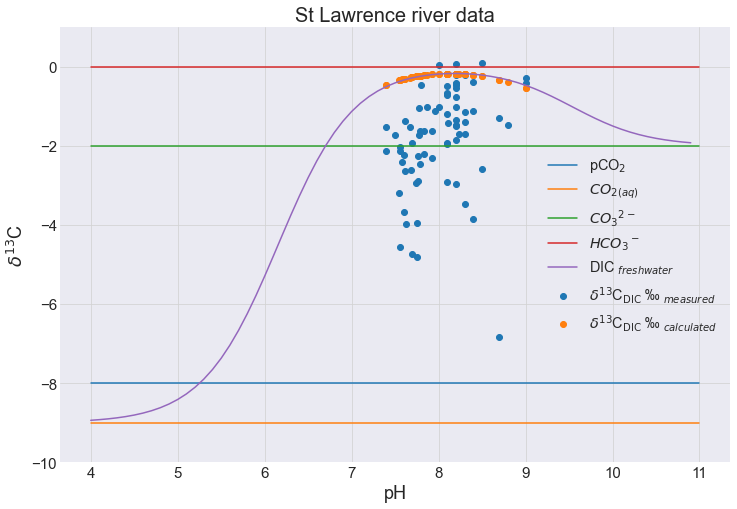

In [32]:
#basic plot for St Lawrence data... ph measured VS d13C_calc and d13C_meas
pCO2=(-8,-8)
CO2aq=(-9,-9)
CO3=(-2,-2)
HCO3=(0,0)
ph = (4,11)

plt.figure(figsize=(12,8))
plt.plot(ph,pCO2,label='pCO${_2}$')
plt.plot(ph,CO2aq, label='$CO_2$$_{(aq)}$')
plt.plot(ph,CO3, label='$CO_3$$^2$$^-$')
plt.plot(ph,HCO3, label='$HCO_3$$^-$')
# plt.plot(pH,d13C_DIC,label='DIC$_{saline}$')
plt.plot(pH,d13C_DIC_FW,label='DIC $_{freshwater}$')
# plt.plot([8.1,8.1],[-10,1],color='c',label = 'Seawater pH')
plt.scatter(data['pH'][idx],data['d13C_DIC'][idx],label='$\delta^{13}$C$_{\mathrm{DIC}}$ ‰ $_{measured}$')
plt.scatter(data['pH'][idx],d13C_DIC_pred_SL,label='$\delta^{13}$C$_{\mathrm{DIC}}$ ‰ $_{calculated}$')
plt.ylim(-10,1)

    
#make pretty
plt.xlabel('pH',fontsize=18)
plt.ylabel('$\delta^{13}$C',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='lightgrey')
plt.legend(loc='best',fontsize='x-large',frameon=False)
plt.title('St Lawrence river data',fontsize=20)

plt.savefig('St.Lawrence_data.png')

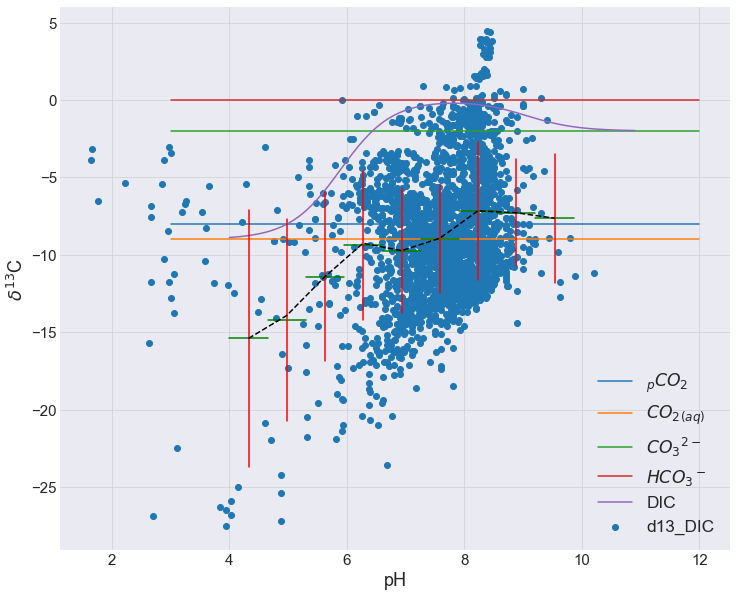

In [36]:
#basic plot
pCO2=(-8,-8)
CO2aq=(-9,-9)
CO3=(-2,-2)
HCO3=(0,0)
ph = (3,12)
y = data['d13C_DIC']
x = data['pH']

plt.figure(figsize=(12,10))
plt.plot(ph,pCO2,label='$_pCO_2$')
plt.plot(ph,CO2aq, label='$CO_2$$_{(aq)}$')
plt.plot(ph,CO3, label='$CO_3$$^2$$^-$')
plt.plot(ph,HCO3, label='$HCO_3$$^-$')
plt.plot(pH,d13C_DIC,label='DIC')

#add real data
plt.scatter(x,y,label='d13_DIC')

#add binned data mean range and standard deviation
bins=np.hstack((np.linspace(4,9.86,10)[0:-1].reshape(-1,1),np.linspace(4,9.86,10)[1:].reshape(-1,1)))
my_line=[]

for i,b in enumerate(bins):
    mu=np.mean(data['d13C_DIC'][(data['pH']>=b[0]) & (data['pH']<b[1])])
    std=np.std(data['d13C_DIC'][(data['pH']>=b[0]) & (data['pH']<b[1])])
    plt.plot([b[0],b[1]],[mu,mu],'g-') #x-range

    plt.plot([np.mean(b),np.mean(b)],[mu+std,mu-std],'r-')
    
    my_line.append([np.mean(b),mu])

my_line=np.array(my_line)
plt.plot(X,Y, linestyle='dashed',color='black')
    
#make pretty
plt.xlabel('pH',fontsize=18)
plt.ylabel('$\delta^{13}$C',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='lightgrey')
plt.legend(loc='best',fontsize='xx-large',frameon=False)

#is there a way I can extract the data the does plot on the line?

In [ ]:
#plotting same figure but with pH calculated and pH measured
#data set with only measured DIC and Alk values for 500+ d13C measurements- 75% or so also have pH measurements

# Import PyCO2SYS
import PyCO2SYS as pyco2

kwargs = dict(
    par1 = data['Alk_trans'],
    par1_type = 1, #alkalinity
    par2 = data['DIC_transformed'],
    par2_type = 2, 
    salinity = 0,
    temperature = 4,
)

# Run PyCO2SYS
results = pyco2.sys(**kwargs)
pH_calc = np.array(results['pH'])


#plot with calculated pH data
plt.figure(figsize=(12,10))
plt.plot(ph,pCO2,label='$_pCO_2$')
plt.plot(ph,CO2aq, label='$CO_2$$_{(aq)}$')
plt.plot(ph,CO3, label='$CO_3$$^2$$^-$')
plt.plot(ph,HCO3, label='$HCO_3$$^-$')
plt.plot(pH,d13C_DIC,label='DIC')

#add real data
plt.scatter(x,y,label='$\delta^{13}$C$_{\mathrm{DIC}}$')

#add calculated pH data
plt.scatter(pH_calc,y,label='$\delta^{13}$C$_{\mathrm{DIC}}$$_{(pH calc)}$')

# #add binned data mean range and standard deviation
# bins=np.hstack((np.linspace(4,9.86,10)[0:-1].reshape(-1,1),np.linspace(4,9.86,10)[1:].reshape(-1,1)))
# for i,b in enumerate(bins):
#     mu=np.mean(data['d13C_DIC'][(data['pH']>=b[0]) & (data['pH']<b[1])])
#     std=np.std(data['d13C_DIC'][(data['pH']>=b[0]) & (data['pH']<b[1])])
#     plt.plot([b[0],b[1]],[mu,mu],'g-') #x-range

#     plt.plot([np.mean(b),np.mean(b)],[mu+std,mu-std],'r-')
    
# #add silly binned data
# plt.plot(X,Y, linestyle='dashed',color='black')
    
#make pretty
plt.xlabel('pH',fontsize=18)
plt.ylabel('$\delta^{13}$C',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='lightgrey')
plt.legend(loc='best',fontsize='xx-large',frameon=False)


In [ ]:
#adding end member blocks
rect_Com = patches.Rectangle((3, -1), 9, 2, edgecolor='none', facecolor='g',alpha=.3)
rect_Ccw = patches.Rectangle((3, -11.5), 9, 6, edgecolor='none', facecolor='orange',alpha=.3)
rect_Cncw = patches.Rectangle((3, -23), 9, 10, edgecolor='none', facecolor='b',alpha=.3)
# Add the patch to the Axes
# figure.add_patch(rect)
fig, ax = plt.subplots(figsize=(12,12))

#add blocks
ax.add_patch(rect_Com)
ax.add_patch(rect_Ccw)
ax.add_patch(rect_Cncw)

ph=(3,12)
C_OM=(-17,-17)
C_CW=(-8.5,-8.5)
C_NCW=(0,0)
plt.plot(ph,C_OM,label=' Biotic carbonic acid-based weathering of silicate minerals')
plt.plot(ph,C_CW,label='Biotic carbonic acid-based weathering of carbonate minerals')
plt.plot(ph,C_NCW,label='Non-carbonic acid-based weathering of carbonate minerals ')

#add real data
plt.scatter(x,y,label='$\delta^{13}$C$_{\mathrm{DIC}}$ rivers')
# plt.plot(pH,d13C_DIC,label='DIC')

#make pretty
plt.xlabel('pH',fontsize=18)
plt.ylabel('$\delta^{13}$C',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='lightgrey')
plt.legend(loc='best',fontsize='x-large',frameon=False)

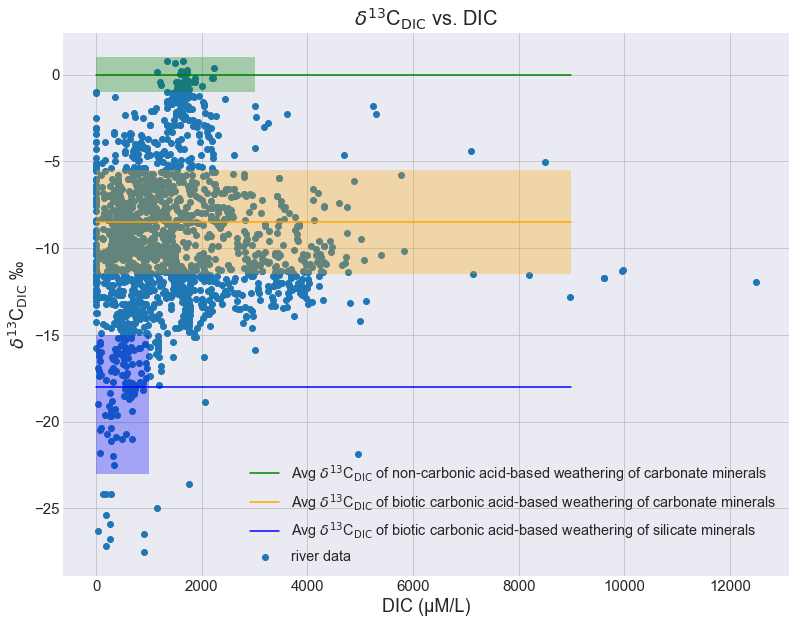

In [17]:
#adding end member blocks to DIC vs d13C 

rect_Com = patches.Rectangle((0, -1), 3000, 2, edgecolor='none', facecolor='g',alpha=.3)
rect_Ccw = patches.Rectangle((0, -11.5), 9000, 6, edgecolor='none', facecolor='orange',alpha=.3)
rect_Cncw = patches.Rectangle((0, -23), 1000, 8, edgecolor='none', facecolor='b',alpha=.3)

fig, ax = plt.subplots(figsize=(13,10))

ax.add_patch(rect_Com)
ax.add_patch(rect_Ccw)
ax.add_patch(rect_Cncw)

DIC=(0,9000)
C_OM=(-18,-18)
C_CW=(-8.5,-8.5)
C_NCW=(0,0)
plt.plot(DIC,C_NCW,color='g',label='Avg $\delta^{13}$C$_{\mathrm{DIC}}$ of non-carbonic acid-based weathering of carbonate minerals ')
plt.plot(DIC,C_CW,color='orange',label='Avg $\delta^{13}$C$_{\mathrm{DIC}}$ of biotic carbonic acid-based weathering of carbonate minerals')
plt.plot(DIC,C_OM,color='b',label='Avg $\delta^{13}$C$_{\mathrm{DIC}}$ of biotic carbonic acid-based weathering of silicate minerals')

plt.scatter(data['DIC_transformed'],data['d13C_DIC'],label='river data')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('$\delta^{13}$C$_{\mathrm{DIC}}$ ‰',fontsize=18)
plt.xlabel('DIC (µM/L)',fontsize=18)
plt.title('$\delta^{13}$C$_{\mathrm{DIC}}$ vs. DIC', fontsize=20)
plt.grid(color='silver')
plt.legend(loc='best',fontsize='x-large',frameon=False)

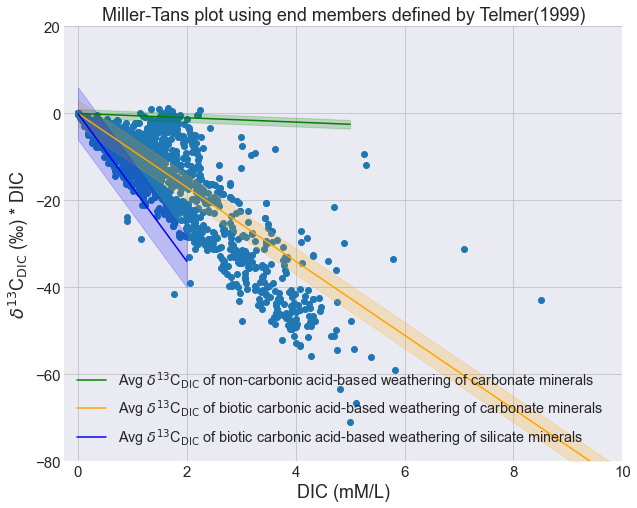

In [18]:
#Miller-Tans plot (from Campeau 2018)
#using end member values from telmer 1999
#new y axis
DIC=data['DIC_transformed']/1000
d13C=data['d13C_DIC']*DIC

fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(DIC,d13C)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('$\delta^{13}$C$_{\mathrm{DIC}}$ (‰) * DIC',fontsize=18)
plt.xlabel('DIC (mM/L)',fontsize=18)
plt.title('Miller-Tans plot using end members defined by Telmer(1999)',fontsize=18)
plt.grid(color='silver')
plt.ylim(-80,20)
plt.xlim(-0.25,10)


#would like to do upper and lower bounds for each end member
x=np.arange(0,6)
y=-0.5*x
y2=1
plt.plot(x,y,color='g',label='Avg $\delta^{13}$C$_{\mathrm{DIC}}$ of non-carbonic acid-based weathering of carbonate minerals ')
ax.fill_between(x, y - y2, y + y2,color='g', alpha=0.2)
x=np.arange(0,11)
y=-8.5*x
y2=3
plt.plot(x,y,color='orange',label='Avg $\delta^{13}$C$_{\mathrm{DIC}}$ of biotic carbonic acid-based weathering of carbonate minerals')
ax.fill_between(x, y - y2, y + y2,color='orange', alpha=0.2)
x=np.arange(0,3)
y=-17*x
y2=6
plt.plot(x,y,color='b',label='Avg $\delta^{13}$C$_{\mathrm{DIC}}$ of biotic carbonic acid-based weathering of silicate minerals')
ax.fill_between(x, y - y2, y + y2,color='b', alpha=0.2)
plt.legend(loc='best',fontsize='x-large',frameon=False)

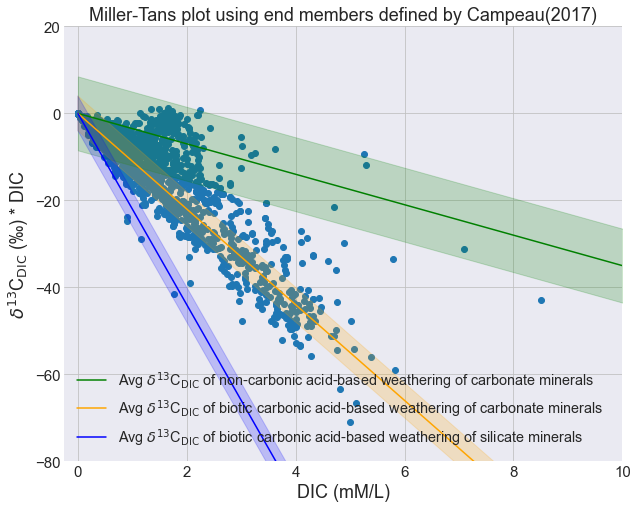

In [19]:
#Miller-Tans plot (from Campeau 2018)
#using end member values from Campeau 2017
#new y axis
DIC=data['DIC_transformed']/1000
d13C=data['d13C_DIC']*DIC

fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(DIC,d13C)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('$\delta^{13}$C$_{\mathrm{DIC}}$ (‰) * DIC',fontsize=18)
plt.xlabel('DIC (mM/L)',fontsize=18)
plt.title('Miller-Tans plot using end members defined by Campeau(2017)',fontsize=18)
plt.grid(color='silver')
plt.ylim(-80,20)
plt.xlim(-0.25,10)


#would like to do upper and lower bounds for each end member

x=np.arange(0,12)
y=-3.5*x
y2=8.5
plt.plot(x,y,color='g',label='Avg $\delta^{13}$C$_{\mathrm{DIC}}$ of non-carbonic acid-based weathering of carbonate minerals ')
ax.fill_between(x, y - y2, y + y2,color='g', alpha=0.2)
x=np.arange(0,11)
y=-11*x
y2=4
plt.plot(x,y,color='orange',label='Avg $\delta^{13}$C$_{\mathrm{DIC}}$ of biotic carbonic acid-based weathering of carbonate minerals')
ax.fill_between(x, y - y2, y + y2,color='orange', alpha=0.2)
x=np.arange(0,8)
y=-22*x
y2=4
plt.plot(x,y,color='b',label='Avg $\delta^{13}$C$_{\mathrm{DIC}}$ of biotic carbonic acid-based weathering of silicate minerals')
ax.fill_between(x, y - y2, y + y2,color='b', alpha=0.2)
plt.legend(loc='best',fontsize='x-large',frameon=False)

(-0.025, 1.0)

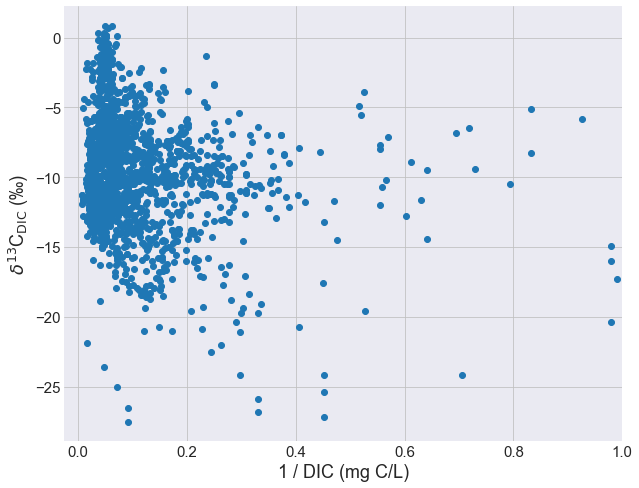

In [20]:
#Keeling plot from Campeau 2018
#umol/L --> mg C/L
DIC_trans=data['DIC_transformed']*12.011/1000
#x axis
DIC=1/DIC_trans

fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(DIC,data['d13C_DIC'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('$\delta^{13}$C$_{\mathrm{DIC}}$ (‰)',fontsize=18)
plt.xlabel('1 / DIC (mg C/L)',fontsize=18)
plt.grid(color='silver')
plt.xlim(-.025,1)


mean =  -0.6915792525982986
min =  -9.49398409038418
max =  1.672797349829625


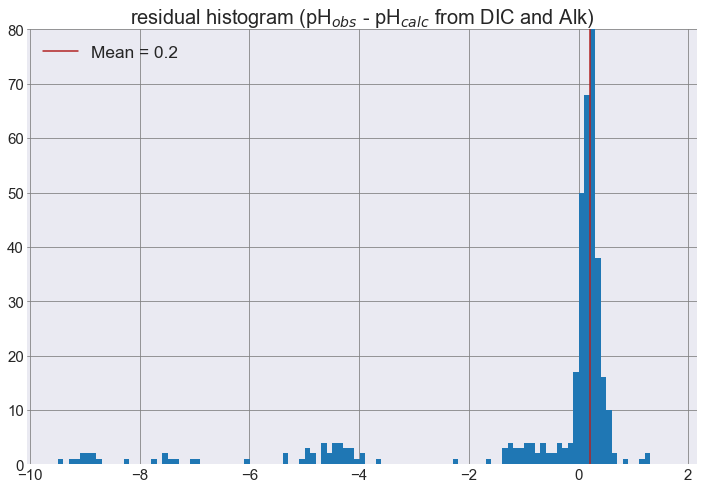

In [19]:
#pH residual
res_ph = data['pH']-pH_calc
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
x_grid=np.arange(np.min(res_ph),np.max(res_ph),0.1)
plt.hist(res_ph,bins=x_grid)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylabel('',fontsize=18)
plt.title('residual histogram (pH$_{obs}$ - pH$_{calc}$ from DIC and Alk)', fontsize=20)
plt.grid(color='grey')

plt.plot([0.2,0.2],[0,100],color='firebrick',label='Mean = 0.2')
plt.ylim(0,80)
print('mean = ', np.mean(res_ph))
print('min = ', np.min(res_ph))
print('max = ', np.max(res_ph))
plt.legend(loc='best',fontsize='xx-large',frameon=False)

mean =  -7.141496250175476


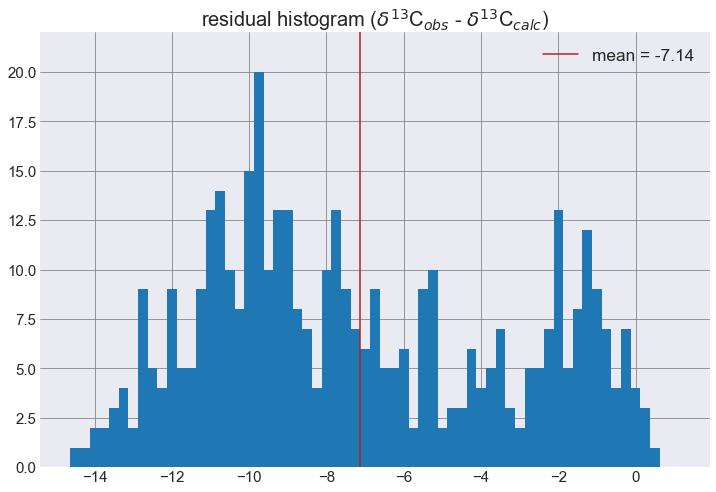

In [95]:
#d13C_DIC residual from equilibrium
#first calculate d13C_DIC predicted
#calculate d13C_pred

T=25    #degree C
S=0    #PSS
TK = T + 273.15 
DIC=np.array(data['DIC_transformed'])

K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))


H=10**(-pH_calc)  

HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))
CO2aq=-9
CO3=-2
HCO3=0
d13C_DIC_pred = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3
# print(d13C_DIC_pred)

#d13C residual calculation and plot
res_d13C = data['d13C_DIC']-d13C_DIC_pred
x_grid=np.arange(np.min(res_d13C),np.max(res_d13C),0.25)
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.hist(res_d13C,bins=x_grid)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylabel('',fontsize=18)
plt.title('residual histogram ($\delta^{13}$C$_{obs}$ - $\delta^{13}$C$_{calc}$)', fontsize=20)
plt.grid(color='grey')

plt.plot([-7.14,-7.14],[0,55],color='firebrick',label='mean = -7.14')
print('mean = ', np.mean(res_d13C))
plt.ylim(0,22)
plt.legend(loc='best',fontsize='xx-large',frameon=False)

In [81]:
#plotting 3 rivers

#Klamath needs to have pH calculated - use pyCO2sys
data4=pd.read_excel('Klamath_data.xlsx')
kwargs = dict(
    par1 = data4['ppmv'],
    par1_type = 4, #alkalinity
    par2 = data4['DIC'],
    par2_type = 2 #DIC
)
# Import PyCO2SYS
import PyCO2SYS as pyco2

# Run PyCO2SYS
results = pyco2.sys(**kwargs)

# Extract and print out the result
pH_klamath = results['pH']
# print(np.array(pH_klamath))

/Users/oliviawren/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


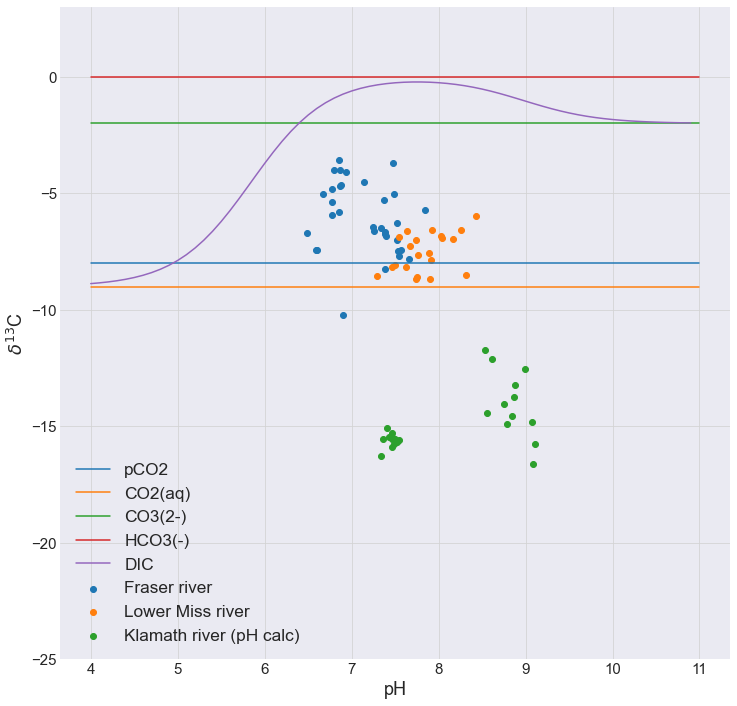

In [82]:
#plotting 3 rivers
data2=pd.read_excel('Frasser_data.xlsx')
data3=pd.read_excel('Miss_data.xlsx') 

pCO2=(-8,-8)
CO2aq=(-9,-9)
CO3=(-2,-2)
HCO3=(0,0)
ph = (4,11)

plt.figure(figsize=(12,12))
plt.plot(ph,pCO2,label='pCO2')
plt.plot(ph,CO2aq, label='CO2(aq)')
plt.plot(ph,CO3, label='CO3(2-)')
plt.plot(ph,HCO3, label='HCO3(-)')
plt.plot(pH,d13C_DIC,label='DIC')
plt.xlabel('pH',fontsize=18)
plt.ylabel('$\delta^{13}$C',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='lightgrey')
plt.ylim(-25,3)
plt.scatter(data2['pH'],data2['d13C'],label = 'Fraser river')
plt.scatter(data3['pH'],data3['d13C'],label = 'Lower Miss river')
plt.scatter(pH_klamath ,data4['d13C_DIC'],label = 'Klamath river (pH calc)')
# plt.scatter(X,Y,label='pH binned averages for d13C data',color='black')
# plt.plot(X,Y, linestyle='dashed',color='black')
plt.legend(loc='best',fontsize='xx-large',frameon=False)


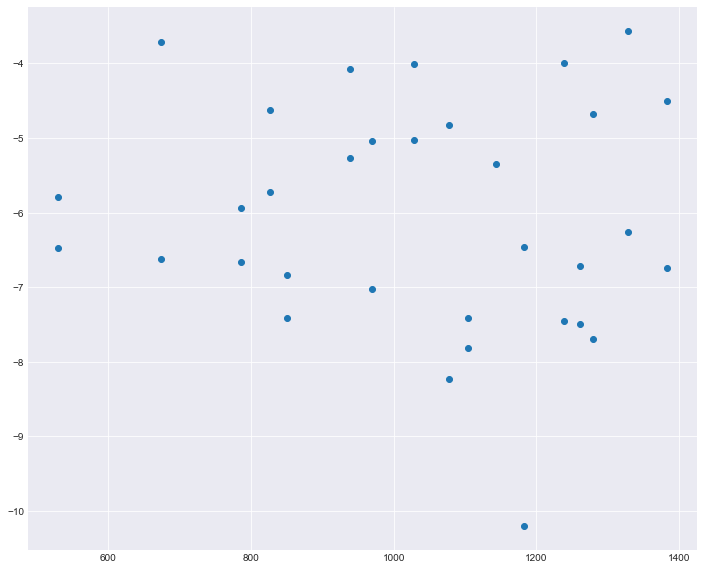

In [83]:
#distance to shore- fraser
#add seasonality
x = data2['dist_km']
y = data2['d13C']

plt.figure(figsize=(12,10))
plt.scatter(x,y)